# FYP Assignment 3 - Data Preprocessing

Exploratory data analysis, visualization, and preprocessing of Zheng's energy consumption dataset.

## Reading Data

In [76]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [77]:
# Read entire dataset at once as a dataframe - 167 MB so this isn't intractable
data = pd.read_csv('./data.csv')

## Exploratory Data Analysis

### Overview of `DataFrame`

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42372 entries, 0 to 42371
Columns: 1036 entries, CONS_NO to 2016/9/9
dtypes: float64(1034), int64(1), object(1)
memory usage: 334.9+ MB


### Statistical summary of numerical columns

In [33]:
# Save the description into a new dataframe to index counts for visualizing missing values
description_df = data.describe()

In [34]:
# Echo the dataframe
description_df

,FLAG,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,2014/1/17,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
count,42372.000000,25870.000000,25912.000000,25911.000000,25912.00000,25912.000000,25912.000000,25915.000000,25924.000000,25925.000000,...,40544.000000,41482.000000,41915.000000,41151.000000,41906.000000,41873.000000,41850.000000,41967.000000,42044.000000,42027.00000
mean,0.085316,7.168735,6.954202,6.784099,7.08430,10.516470,7.219633,7.341512,7.160004,6.839875,...,8.836129,9.304656,10.758718,9.942215,11.173498,11.482926,11.656425,11.322680,11.015589,10.69165
std,0.279354,34.131237,40.017856,38.327058,31.98716,576.388348,34.703617,36.569049,36.916957,30.235396,...,52.371956,57.063621,88.039832,62.010381,94.267851,100.971180,118.369381,103.891111,100.614909,107.25814
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.660000,0.820000,0.880000,0.880000,0.900000,0.920000,0.940000,0.910000,0.910000,0.90000
50%,0.000000,3.310000,2.870000,2.900000,3.35000,3.440000,3.295000,3.470000,3.130000,3.250000,...,4.380000,4.670000,5.010000,4.820000,5.150000,5.110000,5.190000,5.110000,5.020000,4.93000
75%,0.000000,8.910000,8.170000,8.210000,8.76000,8.620000,8.740000,8.900000,8.780000,8.520000,...,9.300000,9.380000,10.740000,9.700000,11.380000,11.430000,11.600000,11.300000,10.730000,10.28000
max,1.000000,3318.000000,3966.000000,4392.000000,3414.00000,92713.900000,3167.000000,3960.000000,3654.000000,3306.000000,...,6324.000000,6990.000000,14640.000000,6672.000000,16320.000000,17100.000000,21210.000000,17940.000000,16710.000000,18570.00000


### Visualizing Missing Values
Since there are more than 1,000 columns in the dataset, using `head` for an overview of the data is not a good way to visualize missing values. Instead, creating a new dataframe of non-null values in each column of the dataset and plotting it.

In [35]:
# Extract counts for all dates - this will then be plotted to visualize missing values
value_counts = data.describe().loc['count'].drop('FLAG')

In [36]:
# Will use this to create dotted line at 42,372 in plot
max_threshold = np.ones(len(value_counts)) * np.max(value_counts)

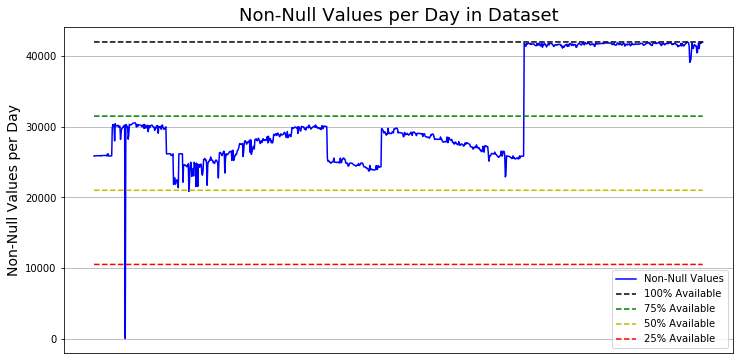

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(value_counts, 'b-', label='Non-Null Values')
plt.plot(max_threshold, 'k--', label='100% Available')
plt.plot(0.75 * max_threshold, 'g--', label='75% Available')
plt.plot(0.50 * max_threshold, 'y--', label='50% Available')
plt.plot(0.25 * max_threshold, 'r--', label='25% Available')
plt.xticks([]) # Do not want indices or dates for now
plt.ylabel('Non-Null Values per Day', fontsize=14)
plt.title('Non-Null Values per Day in Dataset', fontsize=18)
plt.grid(); plt.legend()

There is clearly one day when the number of non-null values drop to ~0. This day should be dropped from the data unless we can figure out how to fill in these missing values using data from previous and next days.

On most days, the number of non-null values in the dataset are between 50% and 75% of the actual number of rows in the dataset. Complete set of readings is onl available towards the end of the dataset i.e in 2016.

In [38]:
# Minimum number of non-null kW readings recorded on a day
min_readings = np.min(value_counts)
max_readings = np.max(value_counts)
idx_min = np.argmin(value_counts)

In [39]:
# What is the date of the day with the 
idx_min

'2014/10/3'

In [40]:
# Display statistics for this day
data[[idx_min]].describe()

,2014/10/3
count,15.000000
mean,484.908667
std,772.293554
min,15.300000
25%,50.300000
50%,144.000000
75%,334.500000
max,2463.000000


### First 5 rows

In [41]:
# What do the first 5 rows in the dataset look like?
data.head()

,CONS_NO,FLAG,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
0,0387DD8A07E07FDA6271170F86AD9151,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.12,9.96,16.92,7.60,27.22,18.05,26.47,18.75,17.84,14.92
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,4B75AC4F2D8434CFF62DB64D0BB43103,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B32AC8CC6D5D805AC053557AB05F5343,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.50,9.99,11.78,18.59,26.80,18.57,14.59,12.82,19.37,15.92
4,EDFC78B07BA2908B3395C4EB2304665E,1,2.9,3.42,3.81,4.58,3.56,4.25,3.86,3.53,...,17.77,10.37,15.32,13.51,12.23,14.68,16.35,18.14,18.41,17.31


Lots of `NaN`s or missing values for the first 3 consumers. Also, the dates don't look entirely sequential: there is a jump from 1/1/2014 to 10/1/2014. The format of the dates is also very awkward - `YYYY/MM/DD`. 

Consumer number is an irrelevant column. Should be dropped. 

`FLAG` column is our **target** - this is what we will be trying to predict.

Need to systematically visualize or identify proportion of `NaN`s in this dataset. Lots of missing values. 

### What about the last 5 rows?

In [16]:
data.tail()

,CONS_NO,FLAG,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
42367,F1472871E1AFF49D4289564B6377D76C,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.25,3.56,3.38,4.39,3.72,3.77,3.96,3.64,3.40,4.38
42368,F3C8BBCD2DC26C1E0249DEEF6A4256B7,0,2.70,4.39,3.95,0.0,0.00,0.00,0.00,0.00,...,4.81,4.87,4.48,3.67,3.31,4.58,3.33,3.19,4.57,4.00
42369,A9A0FE83467A680FBFB0DBFC910DF227,0,0.58,0.84,1.61,0.9,0.60,0.82,0.89,0.03,...,NaN,0.66,2.92,2.36,3.86,4.28,3.37,6.67,2.44,1.15
42370,D9A6ADA018FA46A55D5438370456AA45,0,16.89,13.84,13.50,14.6,14.46,12.34,15.37,17.01,...,21.13,13.75,22.61,18.83,25.52,18.11,19.31,17.48,17.20,15.28
42371,F3406636BAD1E6E0826E8EDDC9A1BF00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.80,4.45,9.80,5.11,16.69,12.04,9.90,8.23,8.56,9.86


### Distribution of non-null values based on consumer type

Do regular consumers have fewer missing values than thieves?

In [42]:
# Count non-null values in each column based on FLAG column value
grouped_by_flag = data.groupby('FLAG').count()
grouped_by_flag

,CONS_NO,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,2014/1/17,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
FLAG,,,,,,,,,,,,,,,,,,,,,
0,38757,23742,23773,23773,23773,23772,23774,23778,23781,23782,...,37121,38025,38413,37674,38403,38374,38341,38459,38544,38526
1,3615,2128,2139,2138,2139,2140,2138,2137,2143,2143,...,3423,3457,3502,3477,3503,3499,3509,3508,3500,3501


In [43]:
grouped_by_flag[['CONS_NO']]

,CONS_NO
FLAG,
0,38757
1,3615


In [44]:
print("%age distribution of classes\nb")
print(grouped_by_flag[['CONS_NO']]/len(data[['CONS_NO']]))

%age distribution of classes
b
       CONS_NO
FLAG          
0     0.914684
1     0.085316


Text(0.5, 1.0, 'Class Distribution')

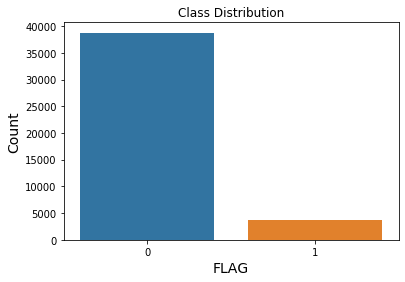

In [45]:
sns.countplot(x='FLAG', data=data)
plt.xlabel('FLAG', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Class Distribution')

This is an unbalanced classification problem - there is a 91.5-8.5% split between negative and positive (target) class in the dataset.

### Visualizing Missing Values per Category

In [46]:
grouped_by_flag.head()

,CONS_NO,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,2014/1/17,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
FLAG,,,,,,,,,,,,,,,,,,,,,
0,38757,23742,23773,23773,23773,23772,23774,23778,23781,23782,...,37121,38025,38413,37674,38403,38374,38341,38459,38544,38526
1,3615,2128,2139,2138,2139,2140,2138,2137,2143,2143,...,3423,3457,3502,3477,3503,3499,3509,3508,3500,3501


In [47]:
# Get regular consumer's non-null values
reg_non_null_counts = grouped_by_flag.iloc[0, 1:]
thieves_non_null_counts = grouped_by_flag.iloc[1, 1:]

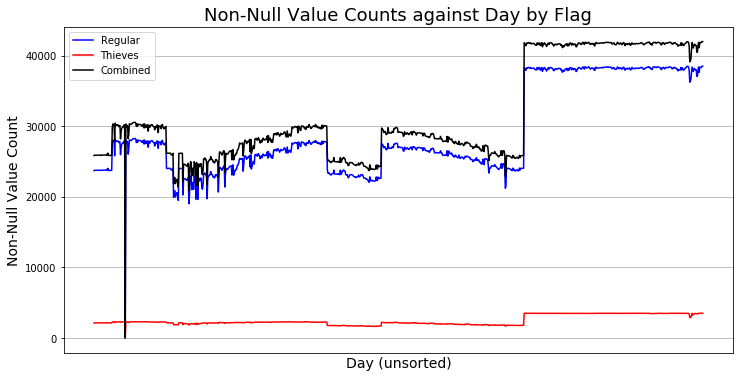

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(reg_non_null_counts, 'b-', label='Regular')
plt.plot(thieves_non_null_counts, 'r-', label='Thieves');
plt.plot(value_counts, 'k-', label='Combined')
plt.title('Non-Null Value Counts against Day by Flag', fontsize=18)
plt.xticks([]); plt.xlabel('Day (unsorted)', fontsize=14);
plt.ylabel('Non-Null Value Count', fontsize=14); plt.grid(True); plt.legend()

This plot shows that there is a lot more variation in the number of missing values for regular consumers than in those of thieves. The number of non-null values in thieves is more or less a flat line with an occasional jump here and there.

However, this may just be because the proportion of thief values in the dataset is very small, so on the scale of this graph, it gives the false impression that there isn't much variation. There could be a substantial number of missing thief values as a percentage of the total thief values. Needs further investigation.

In [49]:
# Total number of consumers - found using number of unique consumer numbers
total_consumers = data[['CONS_NO']].nunique()
print("Total Consumers: ", total_consumers)

# Total number of regular consumers and thieves - found by grouping by flag
total_reg_consumers = grouped_by_flag[['CONS_NO']].loc[0]
total_thieves = grouped_by_flag[['CONS_NO']].loc[1]

print("Regular Consumers: ", total_reg_consumers)
print("Thieves: ", total_thieves)

Total Consumers:  CONS_NO    42372
dtype: int64
Regular Consumers:  CONS_NO    38757
Name: 0, dtype: int64
Thieves:  CONS_NO    3615
Name: 1, dtype: int64


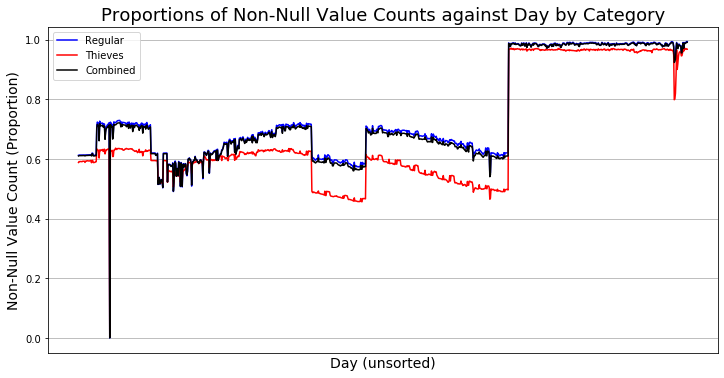

In [50]:
# Will use these constants to plot non-null values as proportion of their respective category
plt.figure(figsize=(12, 6))
plt.plot(reg_non_null_counts / float(total_reg_consumers), 'b-', label='Regular')
plt.plot(thieves_non_null_counts / float(total_thieves), 'r-', label='Thieves');
plt.plot(value_counts / float(total_consumers), 'k-', label='Combined')
plt.title('Proportions of Non-Null Value Counts against Day by Category', fontsize=18)
plt.xticks([]); plt.xlabel('Day (unsorted)', fontsize=14);
plt.ylabel('Non-Null Value Count (Proportion)', fontsize=14); plt.grid(True); plt.legend()

This graph gives a much better indication of the number of missing values per day for the entire dataset (shown in the black line) as well as for individual categories (thieves and regular consumers shown in red and blue respectively).

It confirms my suspicion that the apparent lack of variation in number of non-null thief values was only due to the scale of the raw thief counts being orders of magnitude smaller than those of regular consumers and the entire dataset. Once the number of non-null kWh readings for thieves per day are scaled by the maximum number of values that could have been measured, the trend is very similar to the entire dataset and to the regular consumers.

**Ideas to Consider**
- **Missing Values As Features**: There is a significant difference (~-0.1 units) between the proportion of non-null values for thieves and regular consumers. Could this mean that the absence of kWh readings can be a possible feature for distinguishing the two?
- **Why**: why is there a difference between the proportion of non-null values for thieves and regular consumers? Could this be due to thieves bypassing their meters? Is this relevant?

### Rearranging Columns Chronologically (Subset)

In [51]:
# What is the data type of the columns?
cols = data.columns.tolist()

# Output the values starting from the 2nd index 
print(cols[2:10])

# What is the type of each of these dates? Is it a string or a datetime?
print(type(cols[2]))

['2014/1/1', '2014/1/10', '2014/1/11', '2014/1/12', '2014/1/13', '2014/1/14', '2014/1/15', '2014/1/16']
<class 'str'>


In [54]:
print(len(cols[2:]))

1034


The dates are stored as **strings** and not as `datetime` objects, which would explain why they appear to be out of order: they are sorted lexicographically rather than chronologically.

The solution is to convert each column header from `string` to `datetime`, and then sort the dataset according to `datetime` values in ascending order. This will get rid of the lack of sequence.

In [78]:
# Making a copy of the dataset to test modification of columns
new_df = data.iloc[:, :]

In [79]:
new_df.describe()

,FLAG,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,2014/1/17,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
count,42372.000000,25870.000000,25912.000000,25911.000000,25912.00000,25912.000000,25912.000000,25915.000000,25924.000000,25925.000000,...,40544.000000,41482.000000,41915.000000,41151.000000,41906.000000,41873.000000,41850.000000,41967.000000,42044.000000,42027.00000
mean,0.085316,7.168735,6.954202,6.784099,7.08430,10.516470,7.219633,7.341512,7.160004,6.839875,...,8.836129,9.304656,10.758718,9.942215,11.173498,11.482926,11.656425,11.322680,11.015589,10.69165
std,0.279354,34.131237,40.017856,38.327058,31.98716,576.388348,34.703617,36.569049,36.916957,30.235396,...,52.371956,57.063621,88.039832,62.010381,94.267851,100.971180,118.369381,103.891111,100.614909,107.25814
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.660000,0.820000,0.880000,0.880000,0.900000,0.920000,0.940000,0.910000,0.910000,0.90000
50%,0.000000,3.310000,2.870000,2.900000,3.35000,3.440000,3.295000,3.470000,3.130000,3.250000,...,4.380000,4.670000,5.010000,4.820000,5.150000,5.110000,5.190000,5.110000,5.020000,4.93000
75%,0.000000,8.910000,8.170000,8.210000,8.76000,8.620000,8.740000,8.900000,8.780000,8.520000,...,9.300000,9.380000,10.740000,9.700000,11.380000,11.430000,11.600000,11.300000,10.730000,10.28000
max,1.000000,3318.000000,3966.000000,4392.000000,3414.00000,92713.900000,3167.000000,3960.000000,3654.000000,3306.000000,...,6324.000000,6990.000000,14640.000000,6672.000000,16320.000000,17100.000000,21210.000000,17940.000000,16710.000000,18570.00000


In [80]:
# Extract the date columns pnly - not flag or CONS_NO
columns = new_df.columns[2:]

In [81]:
# Convert to datetime in specified format
new_cols = pd.to_datetime(columns)

In [82]:
# Great success
new_cols.sort_values()

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-07', '2014-01-08',
               '2014-01-09', '2014-01-10',
               ...
               '2016-10-22', '2016-10-23', '2016-10-24', '2016-10-25',
               '2016-10-26', '2016-10-27', '2016-10-28', '2016-10-29',
               '2016-10-30', '2016-10-31'],
              dtype='datetime64[ns]', length=1034, freq=None)

In [60]:
# Now to apply this to the column names directly
print(new_df.columns[:2])
print(new_df.columns[2:])

Index(['CONS_NO', 'FLAG'], dtype='object')
Index(['2014/1/1', '2014/1/10', '2014/1/11', '2014/1/12', '2014/1/13',
       '2014/1/14', '2014/1/15', '2014/1/16', '2014/1/17', '2014/1/18',
       ...
       '2016/9/28', '2016/9/29', '2016/9/3', '2016/9/30', '2016/9/4',
       '2016/9/5', '2016/9/6', '2016/9/7', '2016/9/8', '2016/9/9'],
      dtype='object', length=1034)


Extract first two columns (`CONS_NO` and `FLAG`) because they don't need to be cast to `datetime`. Then extract the actual date strings (column indices 2 onwards) and cast them to `datetime` and extract **only** the date using the `date` attribute - without it, all column names have an unnecessary `00:00:00` at the end. 

Must concatenate both sets of columns as lists and then assign the result to the new dataframe's columns.

In [83]:
new_df.columns = new_df.columns[:2].tolist() + pd.to_datetime(new_df.columns[2:]).date.tolist()

In [84]:
# Did it work?
new_df.head()

,CONS_NO,FLAG,2014-01-01,2014-01-10,2014-01-11,2014-01-12,2014-01-13,2014-01-14,2014-01-15,2014-01-16,...,2016-09-28,2016-09-29,2016-09-03,2016-09-30,2016-09-04,2016-09-05,2016-09-06,2016-09-07,2016-09-08,2016-09-09
0,0387DD8A07E07FDA6271170F86AD9151,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.12,9.96,16.92,7.60,27.22,18.05,26.47,18.75,17.84,14.92
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,4B75AC4F2D8434CFF62DB64D0BB43103,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B32AC8CC6D5D805AC053557AB05F5343,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.50,9.99,11.78,18.59,26.80,18.57,14.59,12.82,19.37,15.92
4,EDFC78B07BA2908B3395C4EB2304665E,1,2.9,3.42,3.81,4.58,3.56,4.25,3.86,3.53,...,17.77,10.37,15.32,13.51,12.23,14.68,16.35,18.14,18.41,17.31


It worked. Now to sort the columns in ascending order.

In [85]:
# Extract list of column names
dt_cols = new_df.columns[2:]

# Sort them in ascending order
sorted_dt_cols = dt_cols.sort_values()

# Did it work?
print(sorted_dt_cols[:25]) 

Index([2014-01-01, 2014-01-02, 2014-01-03, 2014-01-04, 2014-01-05, 2014-01-06,
       2014-01-07, 2014-01-08, 2014-01-09, 2014-01-10, 2014-01-11, 2014-01-12,
       2014-01-13, 2014-01-14, 2014-01-15, 2014-01-16, 2014-01-17, 2014-01-18,
       2014-01-19, 2014-01-20, 2014-01-21, 2014-01-22, 2014-01-23, 2014-01-24,
       2014-01-25],
      dtype='object')


In [86]:
# Extract the kW into a separate df
kw_df = new_df.iloc[:, 2:]

In [87]:
kw_df.head()

,2014-01-01,2014-01-10,2014-01-11,2014-01-12,2014-01-13,2014-01-14,2014-01-15,2014-01-16,2014-01-17,2014-01-18,...,2016-09-28,2016-09-29,2016-09-03,2016-09-30,2016-09-04,2016-09-05,2016-09-06,2016-09-07,2016-09-08,2016-09-09
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.12,9.96,16.92,7.60,27.22,18.05,26.47,18.75,17.84,14.92
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.50,9.99,11.78,18.59,26.80,18.57,14.59,12.82,19.37,15.92
4,2.9,3.42,3.81,4.58,3.56,4.25,3.86,3.53,3.41,0.85,...,17.77,10.37,15.32,13.51,12.23,14.68,16.35,18.14,18.41,17.31


In [88]:
kw_df.sort_index(axis=1, ascending=True, inplace=True)

In [89]:
# Did it work?
kw_df.head()

,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,2014-01-10,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.20,13.66
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
4,2.9,5.64,6.99,3.32,3.61,5.35,4.73,3.68,3.53,3.42,...,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72


In [90]:
# Extract the consumer number and flags
cons_flags_df = new_df.iloc[:, :2]

# Extract the kWhs separately
kWhs_df = new_df.iloc[:, 2:]

# Sort the kWhs dataframe according to their columns
kWhs_df.sort_index(axis=1, inplace=True, ascending=True)

# Did it work?
kWhs_df.head()

,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,2014-01-10,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.20,13.66
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
4,2.9,5.64,6.99,3.32,3.61,5.35,4.73,3.68,3.53,3.42,...,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72


In [91]:
# For merging the two dataframes together by INNER JOIN, use CONS_NO as key
kWhs_df.insert(0, 'CONS_NO', new_df[['CONS_NO']])

In [92]:
kWhs_df.head()

,CONS_NO,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,0387DD8A07E07FDA6271170F86AD9151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,4B75AC4F2D8434CFF62DB64D0BB43103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.20,13.66
3,B32AC8CC6D5D805AC053557AB05F5343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
4,EDFC78B07BA2908B3395C4EB2304665E,2.9,5.64,6.99,3.32,3.61,5.35,4.73,3.68,3.53,...,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72


In [93]:
# Join the dataframes using CONS_NO as key
sorted_df = pd.merge(left=cons_flags_df, right=kWhs_df, how='left', 
                    on='CONS_NO', left_index=True, right_index=False)

In [94]:
# Did it work?
sorted_df.head()

,CONS_NO,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,0387DD8A07E07FDA6271170F86AD9151,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,4B75AC4F2D8434CFF62DB64D0BB43103,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.20,13.66
3,B32AC8CC6D5D805AC053557AB05F5343,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
4,EDFC78B07BA2908B3395C4EB2304665E,1,2.9,5.64,6.99,3.32,3.61,5.35,4.73,3.68,...,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72


In [95]:
# Compare to original data
data.head()

,CONS_NO,FLAG,2014-01-01,2014-01-10,2014-01-11,2014-01-12,2014-01-13,2014-01-14,2014-01-15,2014-01-16,...,2016-09-28,2016-09-29,2016-09-03,2016-09-30,2016-09-04,2016-09-05,2016-09-06,2016-09-07,2016-09-08,2016-09-09
0,0387DD8A07E07FDA6271170F86AD9151,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.12,9.96,16.92,7.60,27.22,18.05,26.47,18.75,17.84,14.92
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,4B75AC4F2D8434CFF62DB64D0BB43103,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B32AC8CC6D5D805AC053557AB05F5343,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.50,9.99,11.78,18.59,26.80,18.57,14.59,12.82,19.37,15.92
4,EDFC78B07BA2908B3395C4EB2304665E,1,2.9,3.42,3.81,4.58,3.56,4.25,3.86,3.53,...,17.77,10.37,15.32,13.51,12.23,14.68,16.35,18.14,18.41,17.31


In [96]:
# Describe the sorted_df to confirm correct sorting operation
sorted_df.describe()

,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
count,42372.000000,25870.000000,25873.000000,25872.000000,25874.000000,25874.000000,25878.000000,25879.000000,25907.000000,25907.000000,...,41846.000000,41824.000000,41820.000000,41665.000000,41623.000000,41397.000000,41443.000000,41637.000000,41634.000000,41569.000000
mean,0.085316,7.168735,7.057237,6.704972,7.237638,7.394550,6.939544,7.271432,6.862706,6.956579,...,9.555905,9.692272,8.503682,9.032455,9.396710,9.878270,9.934374,8.845107,8.355138,8.224294
std,0.279354,34.131237,30.086443,31.223720,49.508191,41.464202,37.583286,64.114745,34.842458,39.684055,...,77.527527,75.590148,81.278000,79.378526,80.896258,92.312243,88.382736,84.201505,78.702362,70.861576
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.790000,0.810000,0.750000,0.790000,0.810000,0.840000,0.870000,0.790000,0.770000,0.770000
50%,0.000000,3.310000,3.400000,3.110000,3.340000,3.560000,3.325000,3.120000,3.210000,3.120000,...,4.640000,4.780000,4.290000,4.420000,4.530000,4.650000,4.710000,4.450000,4.390000,4.290000
75%,0.000000,8.910000,8.570000,8.110000,8.320000,8.880000,8.290000,8.090000,8.120000,8.210000,...,9.370000,9.662500,8.400000,8.680000,9.010000,9.350000,9.510000,8.750000,8.490000,8.110000
max,1.000000,3318.000000,2500.000000,2674.000000,5670.000000,4854.000000,4170.000000,7119.810000,3546.000000,4416.000000,...,11370.000000,11100.000000,13560.000000,11940.000000,12480.000000,15180.000000,14970.000000,14100.000000,12480.000000,9990.000000


In [108]:
# Save the sorted data for later
sorted_df.to_csv(path_or_buf='./sorted_data.csv')

### Data Sorting Workflow
1. Separate into 2 dataframes - the first being `CONS_NO` and `FLAG`, and the second being `kWhs` 
    - Including `CONS_NO` in both because it helps me join them using `CONS_NO` as a key.
    - Do not include the `CONS_NO` with the `kWhs` at first. Will be done later.
2. Extract column names from the kWhs dataframe and cast them to `datetime` objects.
    - Drop the time, only the date is necessary.
    - Reassign the column names. Don't save them into a separate variable.
3. Use the `sort_index` method on the `kWh` dataframe to reorganize columns in chronological order.
4. Insert the `CONS_NO` column in the sorted/rearranged `kWh` dataframe.
    - Can insert it at any location, but I prefer to use the first column because it is a key.
    - This will be used as a key for merging the constituent dataframes together.
5. Use `merge` to perform an inner join on the two dataframes using the `CONS_NO` column as a key. This eliminates any risk of the rows being combined in the wrong order, or being rearranged due to mismatches.
    - Interpreter was displaying a warning which said something about sorting rows because of a mismatch.
    - Inner join with `merge` avoids this issue entirely.

### TODOS
- Generate graphs of missing value counts in chronological order.
- Implement the interpolation methods defined in the paper.
    - Average of previous and next day if not null.
    - Average of same day in previous and last week if not null.
- Visualize number of values that are outliers based on three sigma rule.

## Examining Missing Values (Chronological)

### Loading the Sorted Data

In [117]:
data = pd.read_csv('./sorted_data.csv', index_col=0)

In [118]:
data.head()

,CONS_NO,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,0387DD8A07E07FDA6271170F86AD9151,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,4B75AC4F2D8434CFF62DB64D0BB43103,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.20,13.66
3,B32AC8CC6D5D805AC053557AB05F5343,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
4,EDFC78B07BA2908B3395C4EB2304665E,1,2.9,5.64,6.99,3.32,3.61,5.35,4.73,3.68,...,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72


In [119]:
data.describe()

,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
count,42372.000000,25870.000000,25873.000000,25872.000000,25874.000000,25874.000000,25878.000000,25879.000000,25907.000000,25907.000000,...,41846.000000,41824.000000,41820.000000,41665.000000,41623.000000,41397.000000,41443.000000,41637.000000,41634.000000,41569.000000
mean,0.085316,7.168735,7.057237,6.704972,7.237638,7.394550,6.939544,7.271432,6.862706,6.956579,...,9.555905,9.692272,8.503682,9.032455,9.396710,9.878270,9.934374,8.845107,8.355138,8.224294
std,0.279354,34.131237,30.086443,31.223720,49.508191,41.464202,37.583286,64.114745,34.842458,39.684055,...,77.527527,75.590148,81.278000,79.378526,80.896258,92.312243,88.382736,84.201505,78.702362,70.861576
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.790000,0.810000,0.750000,0.790000,0.810000,0.840000,0.870000,0.790000,0.770000,0.770000
50%,0.000000,3.310000,3.400000,3.110000,3.340000,3.560000,3.325000,3.120000,3.210000,3.120000,...,4.640000,4.780000,4.290000,4.420000,4.530000,4.650000,4.710000,4.450000,4.390000,4.290000
75%,0.000000,8.910000,8.570000,8.110000,8.320000,8.880000,8.290000,8.090000,8.120000,8.210000,...,9.370000,9.662500,8.400000,8.680000,9.010000,9.350000,9.510000,8.750000,8.490000,8.110000
max,1.000000,3318.000000,2500.000000,2674.000000,5670.000000,4854.000000,4170.000000,7119.810000,3546.000000,4416.000000,...,11370.000000,11100.000000,13560.000000,11940.000000,12480.000000,15180.000000,14970.000000,14100.000000,12480.000000,9990.000000


In [120]:
# Extract counts for all dates - this will then be plotted to visualize missing values
value_counts = data.describe().loc['count'].drop('FLAG')

In [122]:
# Will use this to create dotted line at 42,372 in plot
max_threshold = np.ones(len(value_counts)) * np.max(value_counts)

In [128]:
import matplotlib.dates as mdates

In [130]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
date_fmt = mdates.DateFormatter('%M-%Y')

In [133]:
value_counts.head()

2014-01-01    25870.0
2014-01-02    25873.0
2014-01-03    25872.0
2014-01-04    25874.0
2014-01-05    25874.0
Name: count, dtype: float64

In [134]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, 
                              AutoMinorLocator)

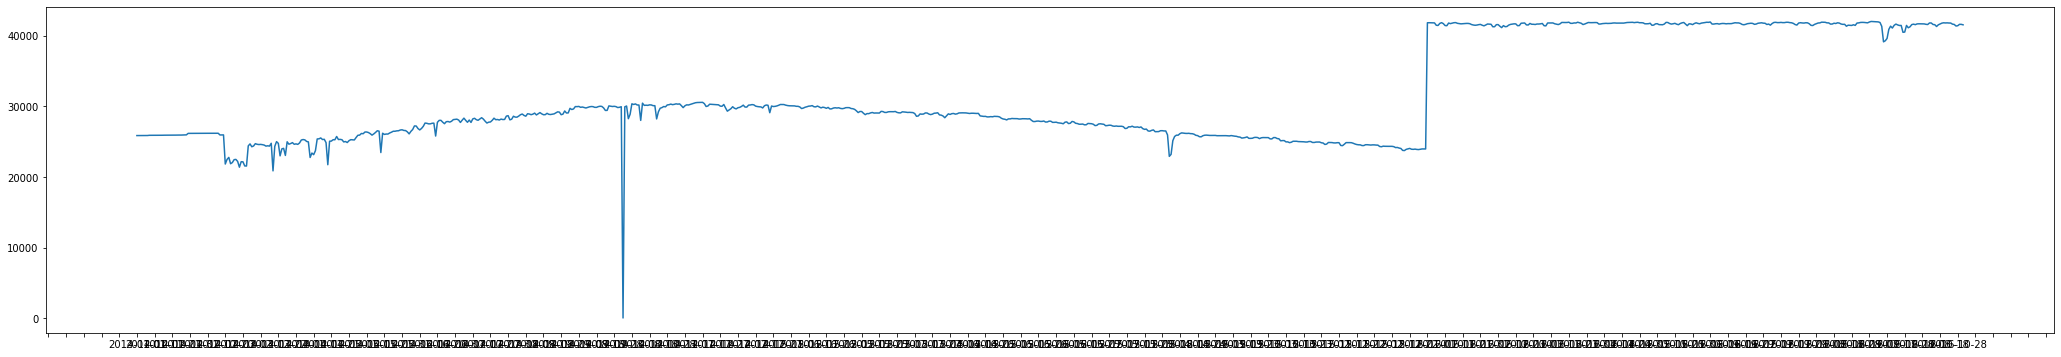

In [141]:
fig, ax = plt.subplots(figsize=(36, 6))
ax.plot(value_counts)
ax.xaxis.set_major_locator(MultipleLocator(10))

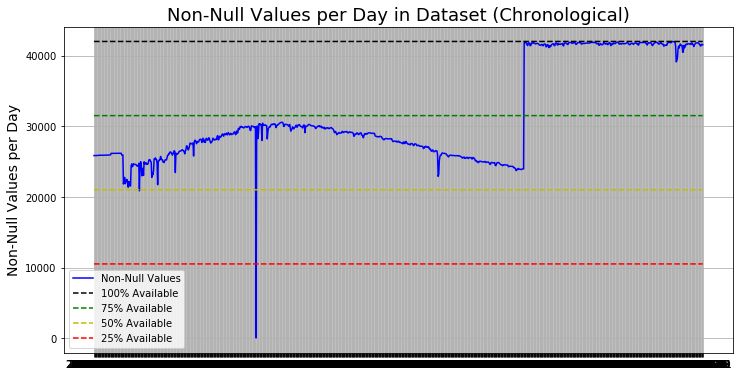

In [132]:
plt.figure(figsize=(12, 6))
plt.plot(value_counts, 'b-', label='Non-Null Values')
plt.plot(max_threshold, 'k--', label='100% Available')
plt.plot(0.75 * max_threshold, 'g--', label='75% Available')
plt.plot(0.50 * max_threshold, 'y--', label='50% Available')
plt.plot(0.25 * max_threshold, 'r--', label='25% Available')
plt.ylabel('Non-Null Values per Day', fontsize=14)
plt.title('Non-Null Values per Day in Dataset (Chronological)', fontsize=18)
plt.grid(); plt.legend()

Once the data has been sorted chronologically, w